In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import requests
import soundfile as sf

from IPython.display import Audio
from scipy.signal import lfilter

%matplotlib inline

# Audio Effects

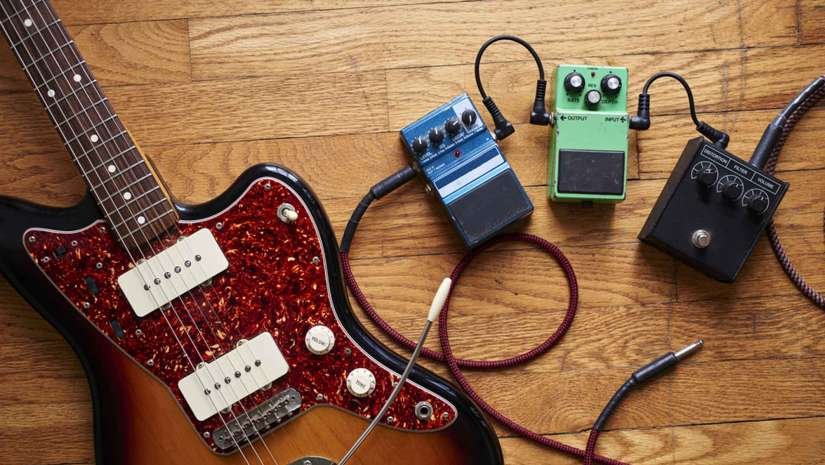

## Reading a sound file

In [ ]:
guitar, samplerate = sf.read('guitar.ogg')
duration = len(guitar) / samplerate  # in seconds
time = np.linspace(0, duration, len(guitar))

plt.figure(figsize=(14, 4))
plt.plot(time, guitar)
plt.xlim(0, duration)
plt.ylim(-1, 1)
plt.xlabel("Time (sec)")

Audio(guitar, rate=samplerate, normalize=False)

## Gain, Distortion, Overdrive

In [ ]:
# "Gain" is used to describe how much louder (or softer) an audio signal is.

gain = 0.05

plt.figure(figsize=(14, 4))
plt.plot(time, gain * guitar)
plt.xlim(0, duration)
plt.ylim(-1, 1)
plt.xlabel("Time (sec)")

Audio(gain * guitar, rate=samplerate, normalize=False)

In [ ]:
# But there are limits to what a computer can represent!
Audio(4 * guitar, rate=samplerate, normalize=False)

In [ ]:
# Simple (clipping) distortion
gain = 2
level = 1
x = np.linspace(-1, 1, 1000)
y = level * np.maximum(np.minimum(gain * x, 1), -1)

plt.figure(figsize=(5, 5))
plt.plot(x, y)
plt.xlabel("Input level")
plt.ylabel("Output level")
plt.title("Distortion Characteristic")

In [ ]:
# Now let's apply it!
gain = 8
level = 0.25
hard_clip = level * np.maximum(np.minimum(gain * guitar, 1), -1)

plt.figure(figsize=(14, 4))
plt.plot(time, hard_clip)
plt.xlim(0, duration)
plt.ylim(-1, 1)
plt.xlabel("Time (sec)")

Audio(hard_clip, rate=samplerate, normalize=False)

In [ ]:
# A slightly smoother distortion
gain = 3
x = np.linspace(-1, 1, 1000)
y = level * np.tanh(gain * x)

plt.figure(figsize=(5, 5))
plt.plot(x, y)
plt.xlabel("Input level")
plt.ylabel("Output level")
plt.title("Soft Distortion Characteristic")

In [ ]:
# Now let's try this!
gain = 8
level = 0.25
overdrive = level * np.tanh(gain * guitar)

plt.figure(figsize=(14, 4))
plt.plot(time, overdrive)
plt.xlim(0, duration)
plt.ylim(-1, 1)
plt.xlabel("Time (sec)")

Audio(overdrive, rate=samplerate, normalize=False)

In [ ]:
# What's the difference? 
Audio(hard_clip - overdrive, rate=samplerate, normalize=False)

## Tremolo

The tremolo effect is what happens when you use a sine-wave as an envelope.

In [ ]:
# First, let's create the tremolo envelope

trem_frequency = 4.0  # Speed of the warble effect
depth = 0.8  # Must be in the range 0 < depth < 1

trem_envelope = depth * np.sin(2 * np.pi * time * trem_frequency) / 2 + (1 - depth/2)

plt.figure(figsize=(14, 4))
plt.plot(time, trem_envelope)
plt.xlim(0, duration)
plt.ylim(0, 1)
plt.xlabel("Time (sec)")

In [ ]:
trem_guitar = trem_envelope * guitar

plt.figure(figsize=(14, 4))
plt.plot(time, trem_guitar)
plt.xlim(0, duration)
plt.ylim(-1, 1)
plt.xlabel("Time (sec)")

Audio(trem_guitar, rate=samplerate, normalize=False)

## Panning

In [ ]:
left = 0.15
right = 1 - left

stereo_guitar = np.array([left * guitar, right * guitar])

figure, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 4), sharex=True)
axes[0].plot(time, stereo_guitar[0])
axes[0].set_ylim(-1, 1)
axes[0].set_ylabel('Left')

axes[1].plot(time, stereo_guitar[1])
axes[1].set_ylim(-1, 1)
axes[1].set_ylabel('Right')

plt.xlim(0, duration)
plt.xlabel("Time (sec)")

Audio(stereo_guitar, rate=samplerate, normalize=False)

In [ ]:
# Auto-panning parameters

pan_frequency = 1.0  # Speed of the warble effect
depth = .8  # Must be in the range 0 < depth < 1
phase = 1

left_envelope = depth * np.sin(2 * np.pi * time * trem_frequency) / 2 + (1 - depth/2)
right_envelope = depth * np.sin(2 * np.pi * time * trem_frequency + phase * np.pi) / 2 + (1 - depth/2)

plt.figure(figsize=(14, 4))
plt.plot(time, left_envelope)
plt.plot(time, right_envelope)
plt.xlim(0, duration)
plt.ylim(0, 1)
plt.xlabel("Time (sec)")

In [ ]:
autopan_guitar = np.array([left_envelope * guitar, right_envelope * guitar])

figure, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 4), sharex=True)
axes[0].plot(time, autopan_guitar[0])
axes[0].set_ylim(-1, 1)
axes[0].set_ylabel('Left')

axes[1].plot(time, autopan_guitar[1])
axes[1].set_ylim(-1, 1)
axes[1].set_ylabel('Right')

plt.xlim(0, duration)
plt.xlabel("Time (sec)")

Audio(autopan_guitar, rate=samplerate, normalize=False)

## Ring Modulation

In [ ]:
ring_frequency = 500
carrier = np.sin(2 * np.pi * time * ring_frequency)

ring_guitar = guitar * carrier
Audio(guitar + 0.5 * ring_guitar, rate=samplerate, normalize=False)

## Delay & Echo

In [ ]:
delay_time = 0.4
delay_gain = 0.5

delay_window = np.zeros(int(delay_time * samplerate))
delay_window[0] = 1
delay_window[-1] = delay_gain

delayed_guitar = lfilter(delay_window, np.ones(1), guitar)

Audio(delayed_guitar, rate=samplerate, normalize=False)

In [ ]:
echo_time = 0.4
echo_gain = 0.5

echo_window = np.zeros(int(echo_time * samplerate))
echo_window[0] = 1
echo_window[-1] = echo_gain

echo_guitar = lfilter(np.ones(1), echo_window, guitar)

Audio(echo_guitar, rate=samplerate, normalize=False)

In [ ]:
# Ping-pong delay
delay_time = 0.4
delay_gain = 0.5

delay_samples = int(delay_time * samplerate)
delay_window = np.zeros(2 * delay_samples)
delay_window[-1] = delay_gain

left_delayed_guitar = lfilter(delay_window, np.ones(1), guitar[delay_samples:])
right_delayed_guitar = lfilter(delay_window, np.ones(1), guitar)[:-delay_samples]

stereo_delayed_guitar = np.array([left_delayed_guitar + guitar[:-delay_samples], 
                                  right_delayed_guitar + guitar[:-delay_samples]])

Audio(stereo_delayed_guitar, rate=samplerate, normalize=False)

## Downloading Audio

You can download certain audio files from the internet to this session using the following code. Not all URLs will work, but feel free to try a few!

This site, for example, has a **ton** of sound effects: http://soundbible.com/

In [ ]:
# Make sure that the file type matches!! (MP3)
url = 'http://soundbible.com/grab.php?id=2219&type=mp3'
response = requests.get(url)
with open('some_file.mp3', 'wb') as fp:
    fp.write(response.content)

In [ ]:
Audio(filename='some_file.mp3')

## Effects Challenge!

Now it's your turn! Recombine the code provided to process audio files. If you're feeling particularly adventurous, try mixing different effects together, and combining with different files!